In [3]:
import sys

IN_COLAB = False

# if in colab, make colab setup
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

    IN_COLAB = True
    ZIP_PATH = "/content/drive/MyDrive/embedded_ml_data/VOCdevkit.zip"
    FILENAME = "person_only_training.ipynb"
    BRANCH = "person-only"
    !git clone -b $BRANCH https://github.com/yannickfunk/EmbeddedMLLab tmp
    !rm tmp/$FILENAME
    !mv tmp/* .
    !rm -rf tmp
    !rm -rf sample_data
    !pip install -r requirements.txt

    # setup data
    !cp  $ZIP_PATH data/
    %pushd data
    !unzip -qq VOCdevkit.zip
    %popd

In [4]:
import torch
GPU_AVAILABLE = torch.cuda.is_available()
DATA_PATH = "data/"

print("Using GPU:", GPU_AVAILABLE)

Using GPU: True


In [5]:
import lightning as pl

from models.tinyyolov2 import TinyYoloV2PersonOnly
from utils.dataloader import VOCDataLoaderPerson

model = TinyYoloV2PersonOnly()
model.load_pt_from_disk("data/voc_pretrained.pt", discard_last_layer=True)

train_loader = VOCDataLoaderPerson(train=True, batch_size=128, shuffle=True, data_path=DATA_PATH)
val_loader = VOCDataLoaderPerson(train=False, batch_size=128, data_path=DATA_PATH)

trainer = pl.Trainer(max_epochs=15, accelerator='gpu' if GPU_AVAILABLE else 'cpu')
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)


filepath = "data/person_only.onnx"
input_sample = torch.zeros(1, 3, 320, 320)
model.to_onnx(filepath, input_sample, export_params=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name  | Type            | Params
-------------------------------------------
0  | loss  | YoloLoss        | 0     
1  | pad   | ReflectionPad2d | 0     
2  | conv1 | Conv2d          | 432   
3  | bn1   | BatchNorm2d     | 32    
4  | conv2 | Conv2d          | 4.6 K 
5  | bn2   | BatchNorm2d     | 64    
6  | conv3 | Conv2d          | 18.4 K
7  | bn3   | BatchNorm2d     | 128   
8  | conv4 | Conv2d          | 73.7 K
9  | bn4   | BatchNorm2d     | 256   
10 | conv5 | Conv2d          | 294 K 
11 | bn5   | BatchNorm2d     | 512   
12 | conv6 | Conv2d          | 1.2 M 
13 | bn6   | BatchNorm2d     | 1.0 K 
14 | conv7 | Conv2d          | 4.7 M 
15 | bn7   | BatchNorm2d     | 2.0 K 
16 | conv8 | Conv2d          | 9.4 M 
17 | bn8   | BatchNorm2d     | 2.0 K 
18 | conv9 | Conv2d          | 30.8 K
-

Freezing layers: conv1.weight, bn1.weight, bn1.bias, conv2.weight, bn2.weight, bn2.bias, conv3.weight, bn3.weight, bn3.bias, conv4.weight, bn4.weight, bn4.bias, conv5.weight, bn5.weight, bn5.bias, conv6.weight, bn6.weight, bn6.bias, conv7.weight, bn7.weight, bn7.bias, 


Sanity Checking: 0it [00:00, ?it/s]

/home/yfunk/anaconda3/envs/embedded-ml/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/yfunk/anaconda3/envs/embedded-ml/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/yfunk/anaconda3/envs/embedded-ml/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consi

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
/home/yfunk/repos/EmbeddedMLLab/models/tinyyolov2.py:138: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if yolo:
/home/yfunk/anaconda3/envs/embedded-ml/lib/python3.10/site-packages/torch/onnx/_internal/jit_utils.py:258: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_node_shape_type_inference(node, params_dict, opset_version)
/home/yfunk/anaconda3/envs/embedded-ml/lib/python3.10/site-packages/torch/onnx/utils.py:687: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied.

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/yfunk/anaconda3/envs/embedded-ml/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:175: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/yfunk/anaconda3/envs/embedded-ml/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

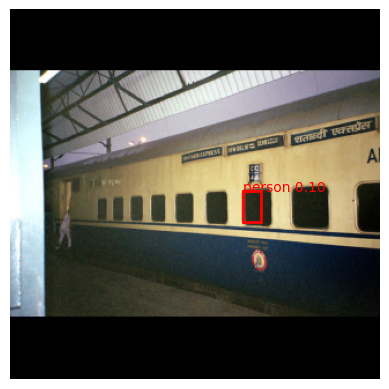

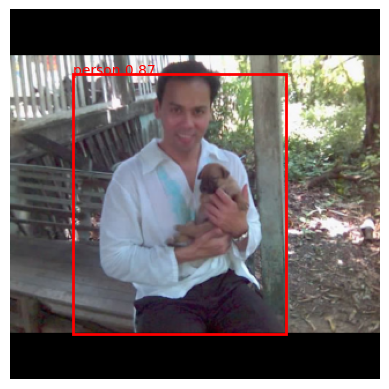

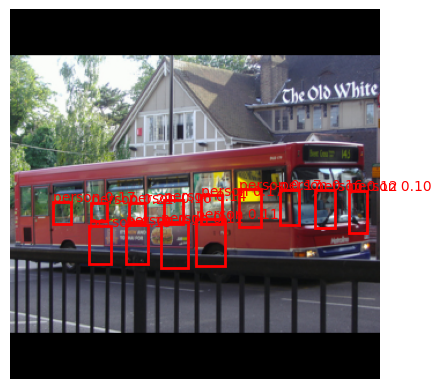

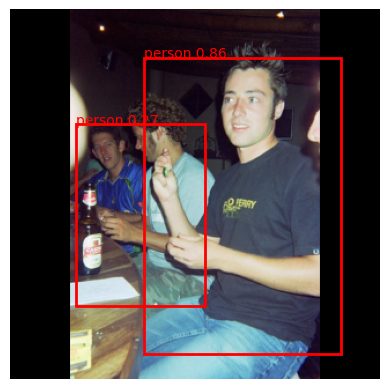

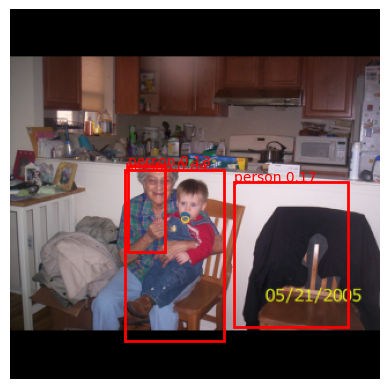

In [10]:
from utils.viz import plot_predictions


test_loader = VOCDataLoaderPerson(train=False, batch_size=5, data_path=DATA_PATH, n_limit=5)
predictions = pl.Trainer().predict(model, test_loader)[0]
for outputs, inputs in zip(*predictions):
    plot_predictions(outputs, inputs, person_only=True)